# PROJECT: INVESTIGATE A IMDB-MOVIES
## This is a dataset containing details on different characteristics of movies as compiled by a movies review site IMDB
### The data has 10866 row entries all classified under 21 columns. The dataset contains information on the id, imdb_id, popularity, budget, revenue, original title, cast, homepage, director, tagline, keywords, overview, runtime, genres, production companies, release date, vote count,vote average, release year, budget adjustments, revenue adjustments.
#### First importing the data and other relevant libraries required for it's analysis

## TABLE OF CONTENTS
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
#### This is a dataset containing details on different characteristics of movies as compiled by a movies review site IMDB. The data has 10866 row entries all classified under 21 columns. The dataset contains information on the id, imdb_id, popularity, budget, revenue, original title, cast, homepage, director, tagline, keywords, overview, runtime, genres, production companies, release date, vote count,vote average, release year, budget adjustments, revenue adjustments.








### I would like to answer the following questions from the dataset:
<ol>
    <li><a href="#q1">what genres had the most movies the years</a></li>
    <li><a href="#q2">how many different actors were present in the movies and how many movies did they act in</a></li>
    <li><a href="#q3">which movies made the most revenue and how popular were they</a></li>
    <li><a href="#q4">what effect does runtime have on a movies popularity</a></li>
    <li><a href="#q5">what movies turned up the most profit and how popular were they</a></li>
    <li><a href="#q6">there are some movies with 0 budget did they turn up a profit and did any movie at all turn up a loss</a></li>
    <li><a href="#q7">effect of vote counts on popularity and profit</a></li>
</ol>

 Before answering these questions though there are some columns that are not needed like the tagline, homepage and overview, so removing this column from our dataset, we do this in our data wrangling process.
 #### But first importing the data and other relevant libraries required for it's analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('tmdb-movies.csv').sort_values('release_year')

## sorting our data based on year and taking a look at the first and last five rows of the data set.
The .head() method is used to call the first 5 rows of the dataset while the .tail() the last 5 rows of the dataset

In [2]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10172,1941,tt0053804,0.256779,0,0,Exodus,Paul Newman|Eva Marie Saint|Lee J. Cobb|Ralph ...,NaN,Otto Preminger,NaN,...,The theme is the founding of the state of Isra...,208,Action|Drama|History|War,Carlyle Productions,3/27/60,14,6.1,1960,0.000000e+00,0.000000e+00
10141,539,tt0054215,2.610362,806948,32000000,Psycho,Anthony Perkins|Vera Miles|John Gavin|Janet Le...,NaN,Alfred Hitchcock,The master of suspense moves his cameras into ...,...,When larcenous real estate clerk Marion Crane ...,109,Drama|Horror|Thriller,Shamley Productions,8/14/60,1180,8.0,1960,5.949601e+06,2.359350e+08
10142,966,tt0054047,1.872132,2000000,4905000,The Magnificent Seven,Yul Brynner|Eli Wallach|Steve McQueen|Charles ...,NaN,John Sturges,They were seven - And they fought like seven h...,...,An oppressed Mexican peasant village hires sev...,128,Action|Adventure|Western,The Mirisch Corporation|Alpha Productions,10/23/60,224,7.0,1960,1.474593e+07,3.616441e+07
10143,967,tt0054331,1.136943,12000000,60000000,Spartacus,Kirk Douglas|Laurence Olivier|Jean Simmons|Cha...,NaN,Stanley Kubrick,More titanic than any story ever told!,...,Spartacus is a 1960 American historical drama ...,197,Action|Drama|History,Bryna Productions,10/6/60,211,6.9,1960,8.847561e+07,4.423780e+08
10144,284,tt0053604,0.947307,3000000,25000000,The Apartment,Jack Lemmon|Shirley MacLaine|Fred MacMurray|Ra...,NaN,Billy Wilder,"Movie-wise, there has never been anything like...",...,Bud Baxter is a minor clerk in a huge New York...,125,Comedy|Drama|Romance,United Artists|The Mirisch Company,6/15/60,235,7.9,1960,2.211890e+07,1.843242e+08


In [3]:
df.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
417,326284,tt3488328,0.248280,7500000,0,Pound of Flesh,Jean-Claude Van Damme|John Ralston|Darren Shah...,NaN,Ernie Barbarash,The black market is about to get bloody,...,In China to donate his kidney to his dying nie...,104,Action,Odyssey Media|Rodin Entertainment|Ace Film Com...,5/7/15,42,5.4,2015,6.899997e+06,0.000000e+00
416,347754,tt3212904,0.248964,0,0,Curve,Julianne Hough|Teddy Sears|Madalyn Horcher|Dre...,NaN,Iain Softley,NaN,...,A young woman becomes trapped in her car after...,86,Horror|Thriller,Universal Pictures|Blumhouse Productions|LBI E...,8/31/15,40,4.4,2015,0.000000e+00,0.000000e+00
415,340968,tt2492296,0.249595,0,0,Show Me a Hero,Oscar Isaac|Alfred Molina|Winona Ryder|Catheri...,NaN,Paul Haggis,How does a politician know he's doing the righ...,...,Mayor Nick Wasicsko took office in 1987 during...,300,History|Crime|Drama,NaN,8/16/15,32,7.7,2015,0.000000e+00,0.000000e+00
422,309425,tt4056738,0.245948,0,0,Do You Believe?,Mira Sorvino|Sean Astin|Alexa PenaVega|Cybill ...,NaN,Jonathan M. Gunn,NaN,...,When a pastor is shaken by the visible faith o...,115,Fantasy|Drama,Believe Entertainment|Pure Flix Entertainment|...,3/20/15,30,7.4,2015,0.000000e+00,0.000000e+00
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


Next we take a look at the datatypes present in our dataset uaing the .info() method

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10866 entries, 10172 to 0
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

Then checking for the total amount of rows and columns our dataset contains using the .shape() method

In [5]:
print('your dataset contains {} rows and {} columns.'.format(df.shape[0], df.shape[1]))

your dataset contains 10866 rows and 21 columns.


<a id='wrangling'></a>
## Data Wrangling

### Next cleaning the dataset by checking for missing values and duplicates in our dataset and removing them, converting columns to the right format and dropping columns which are not relevant to our analysis
This is done using the .drop(), .describe() and .query() methods to mention a few

In [6]:
df.drop(['tagline', 'homepage', 'overview', 'keywords','id'], axis=1, inplace = True)

converting the release_date column to datetime format for better code readability 

In [7]:
df['release_date'] = pd.to_datetime(df['release_date'], format='%m/%d/%y')
df['release_date']

10172   2060-03-27
10141   2060-08-14
10142   2060-10-23
10143   2060-10-06
10144   2060-06-15
           ...    
417     2015-05-07
416     2015-08-31
415     2015-08-16
422     2015-03-20
0       2015-06-09
Name: release_date, Length: 10866, dtype: datetime64[ns]

In [8]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [9]:
df= df.query('popularity<=10')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10855 entries, 10172 to 422
Data columns (total 16 columns):
imdb_id                 10845 non-null object
popularity              10855 non-null float64
budget                  10855 non-null int64
revenue                 10855 non-null int64
original_title          10855 non-null object
cast                    10779 non-null object
director                10811 non-null object
runtime                 10855 non-null int64
genres                  10832 non-null object
production_companies    9825 non-null object
release_date            10855 non-null datetime64[ns]
vote_count              10855 non-null int64
vote_average            10855 non-null float64
release_year            10855 non-null int64
budget_adj              10855 non-null float64
revenue_adj             10855 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(5), object(6)
memory usage: 1.4+ MB


In [11]:
df.drop_duplicates(inplace=True)
sum(df.duplicated())
df.dropna(inplace=True)
print('The cleaned dataset contains {} rows and {} columns.'.format(df.shape[0], df.shape[1]))

The cleaned dataset contains 9759 rows and 16 columns.


In [12]:
df.head(5)

,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10172,tt0053804,0.256779,0,0,Exodus,Paul Newman|Eva Marie Saint|Lee J. Cobb|Ralph ...,Otto Preminger,208,Action|Drama|History|War,Carlyle Productions,2060-03-27,14,6.1,1960,0.000000e+00,0.000000e+00
10141,tt0054215,2.610362,806948,32000000,Psycho,Anthony Perkins|Vera Miles|John Gavin|Janet Le...,Alfred Hitchcock,109,Drama|Horror|Thriller,Shamley Productions,2060-08-14,1180,8.0,1960,5.949601e+06,2.359350e+08
10142,tt0054047,1.872132,2000000,4905000,The Magnificent Seven,Yul Brynner|Eli Wallach|Steve McQueen|Charles ...,John Sturges,128,Action|Adventure|Western,The Mirisch Corporation|Alpha Productions,2060-10-23,224,7.0,1960,1.474593e+07,3.616441e+07
10143,tt0054331,1.136943,12000000,60000000,Spartacus,Kirk Douglas|Laurence Olivier|Jean Simmons|Cha...,Stanley Kubrick,197,Action|Drama|History,Bryna Productions,2060-10-06,211,6.9,1960,8.847561e+07,4.423780e+08
10144,tt0053604,0.947307,3000000,25000000,The Apartment,Jack Lemmon|Shirley MacLaine|Fred MacMurray|Ra...,Billy Wilder,125,Comedy|Drama|Romance,United Artists|The Mirisch Company,2060-06-15,235,7.9,1960,2.211890e+07,1.843242e+08


<a id='eda'></a>
## Exploratory Data Analysis

next let's do a general statistical overview of our numerical rows in the dataset

In [13]:
df.describe()


,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,9759.000000,9.759000e+03,9.759000e+03,9759.000000,9759.000000,9759.000000,9759.000000,9.759000e+03,9.759000e+03
mean,0.676878,1.604536e+07,4.337543e+07,102.910749,234.569526,5.961963,2000.865355,1.929535e+07,5.607437e+07
std,0.851101,3.188835e+07,1.185832e+08,27.862274,584.545024,0.912534,13.035516,3.544224e+07,1.464117e+08
min,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.232390,0.000000e+00,0.000000e+00,90.000000,18.000000,5.400000,1994.000000,0.000000e+00,0.000000e+00
50%,0.419331,1.700000e+05,0.000000e+00,100.000000,46.000000,6.000000,2005.000000,2.929070e+05,0.000000e+00
75%,0.774385,1.900000e+07,3.070102e+07,112.000000,172.000000,6.600000,2011.000000,2.445229e+07,4.259197e+07
max,9.432768,4.250000e+08,2.781506e+09,877.000000,9767.000000,8.700000,2015.000000,4.250000e+08,2.827124e+09


and displaying this data visually using the .hist() method

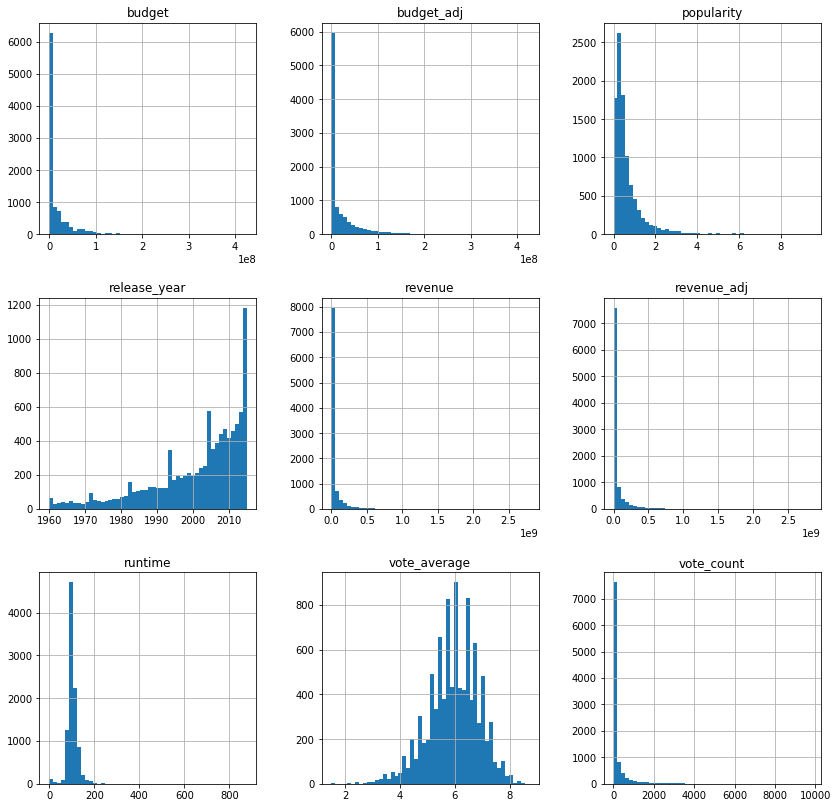

In [14]:
df.hist(bins=50, figsize=(14,14));

conclusions that can be drawn from this plots is that:
* above 6000 movies have a budget between 0 and 15000000
* most movies did a budget adjustment and even then the budget did not go beyond 200000000 for all movies
* most movies in the dataset had a popularity less than 1 rating 
* our dataset contains movies mainly from the year 2014 upwards with the next being the year 2005
* most movies in our dataset turned up a large revenue 
* the adjusted revenue was still high enough
* most movies in our dataset have a runtime between 100 and 160 minutes
* the average vote is 6
* the vote count is averaging 300 votes

### <a id='q1'></a>Question 1

In [15]:
genres = df['genres'].str.get_dummies()
genres.head()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
10172,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
10141,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
10142,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
10143,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
10144,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


this gives us a dataset with showing us the distribution of the genres, returning 1 for true and 0 for false. <p> now to checck for the progression of movies over the years to see how over the years which genres were more preferred</p>

In [16]:
genre_year = (pd.concat([df['imdb_id'], df['release_year'], genres], axis = 1))
genre_year.head()

,imdb_id,release_year,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
10172,tt0053804,1960,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
10141,tt0054215,1960,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
10142,tt0054047,1960,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10143,tt0054331,1960,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
10144,tt0053604,1960,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


Text(0, 0.5, 'number of movies')

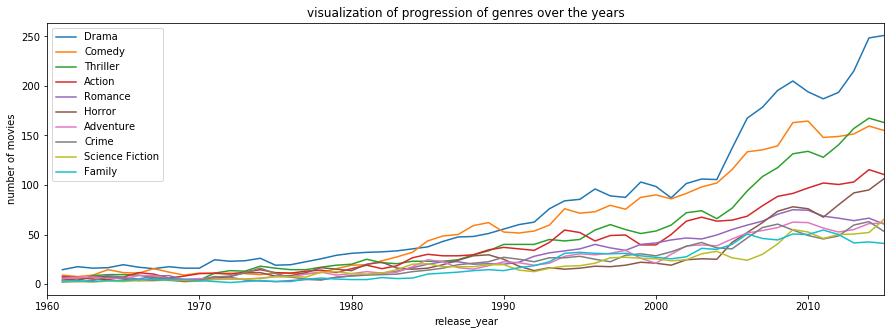

In [17]:
top10_genre=(genre_year.iloc[:, 2:21].sum().sort_values(ascending=False).head(10).index.values)
genre_groups=(genre_year.iloc[:, 1:22].groupby('release_year').sum()).loc[:, top10_genre]
genre_groups.rolling(2).mean().plot(figsize=(15,5), title='visualization of progression of genres over the years');
plt.ylabel('number of movies')

from this visualization showing the top 8 genres over the years we can see that drama is the fastest growing genre with comedy, thri;ller and action following behind. <p>furthr showing the distribution of total movies genre below in the bar chart we see that drama still has the most movies, then comedy, thriller and action</p> 

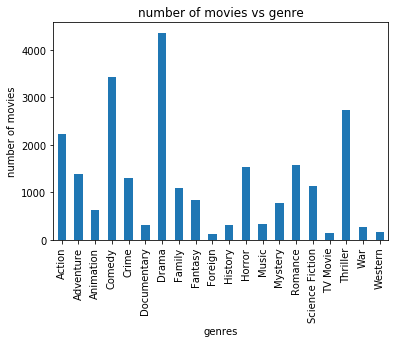

In [18]:
genres.sum().plot(kind='bar', title='number of movies vs genre');
plt.xlabel('genres');
plt.ylabel('number of movies');

now checking for the actors that were present in the movies and the number of movies they acted in 

<a id='q2'></a>
### Question 2

Getting the names of the actors and the number of movies they acted in, in a dictionary

In [19]:
def splits(column):
    actors_lists = []
    for lis in df[column].str.split('|'):
        actors_lists.append(lis)
    return actors_lists
actors_lists = splits('cast')
new_list_actor = []
for sub_list in actors_lists:
    for name in sub_list:
        new_list_actor.append(name)
no=[]       
n_lists={}
for directo in new_list_actor:
    no.append(directo)
for name in no:
    if name in n_lists:
        n_lists[name] += 1
    else:
        n_lists[name] = 1



now converting this dictionary into a dataframe and plotting a bar chart to show the top 40 actors with the numbers of movies

the number of unique actors that all acted in the movies are 17121 actors


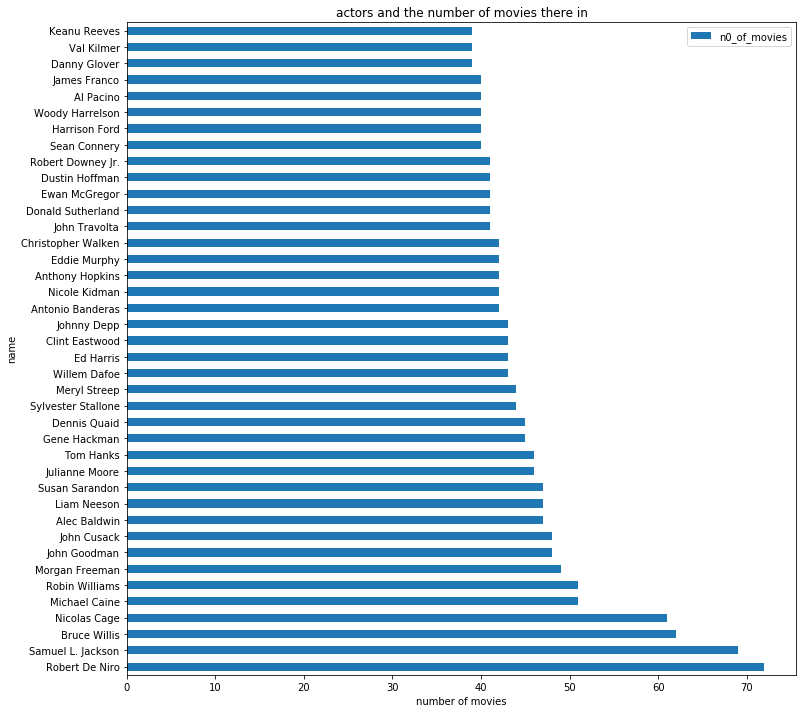

In [20]:
actors = pd.DataFrame.from_dict(n_lists, orient= 'index')
actors = actors.reset_index()
actors.columns = ['name', 'n0_of_movies']
new =actors.sort_values('n0_of_movies', ascending = False)
new = new.head(40)
new.plot(x='name', kind='barh', title='actors and the number of movies there in', figsize=(12,12));
plt.ylabel('name')
plt.xlabel('number of movies')
print('the number of unique actors that all acted in the movies are {} actors'.format(actors.shape[0]))

The visualization above shows the number of movies acted by the fourty top actors, the actor with the most movies being Robert De Niro.

In [21]:
new[new['name'].str.contains('Robert De Niro')]

,name,n0_of_movies
1535,Robert De Niro,72


who has 72 movies

<a id='q3'></a>
### Question 3

## From this visualization we can see that the more popular a movie was the more money they had to spend on their budget, we can say that maybe advertisement contributed to the high budget required intially for the movie as the chart shows an exponential increase in budget for popularity

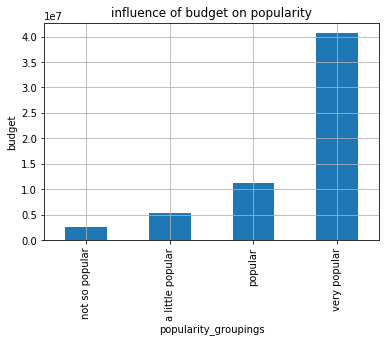

In [22]:
cuts = [0, 0.207, 0.384, 0.714, 10]
cut_names = ['not so popular', 'a little popular', 'popular', 'very popular']
df['popularity_groupings'] = pd.cut(df['popularity'], cuts, labels=cut_names)
df.groupby('popularity_groupings').budget.mean().plot(kind='bar', title='influence of budget on popularity');
plt.ylabel('budget')
plt.grid(True)

### Question 4
<a id='q4'></a>

## From the pie chart brlow we are able to visualize the effect of movies length on the popularity of movies and we see that the most popular ovies are those with the designation standard length which have a runtime between the range of 112 and 180 minutes.

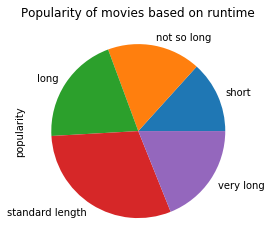

In [23]:
cuts = [0, 90, 100, 112, 180, 877]
cut_names = ['short', 'not so long', 'long','standard length', 'very long']
df['movie_length'] = pd.cut(df['runtime'], cuts, labels=cut_names)
df.groupby('movie_length').popularity.mean().plot(kind='pie', title='Popularity of movies based on runtime');


#### Next checking for the profit realized by each movie and creating a dataframe column for this profit

In [24]:
df['profit'] = df['revenue'] - df['budget']

#### Creating a seperate dataframe to contain the profit, budget and revenue data

In [25]:
df_p = df[['budget', 'revenue', 'profit']]

### Question 5
<a id='q5'></a>

## The bar chart below shows that the popular movies are the ones that bring about the most profit

Text(0, 0.5, 'profit')

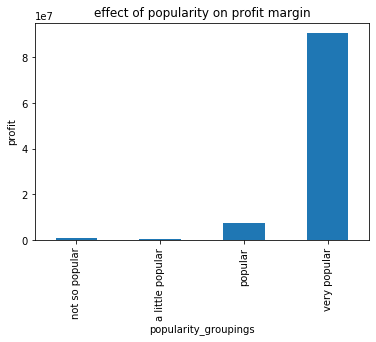

In [26]:
df.groupby('popularity_groupings').profit.mean().plot(kind='bar', title='effect of popularity on profit margin');
plt.ylabel('profit')

from the above chart the very popular movies had a larger profit margin

### Question 6 <a id='q6'></a>

## The scatter plot and the box plot show a mainly positive trendline with there generally being a profit for the budget put in with some movies turning up a loss.

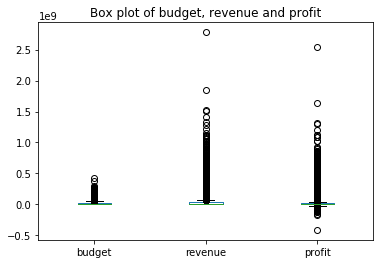

In [27]:
df_p.plot(kind='box', title='Box plot of budget, revenue and profit');

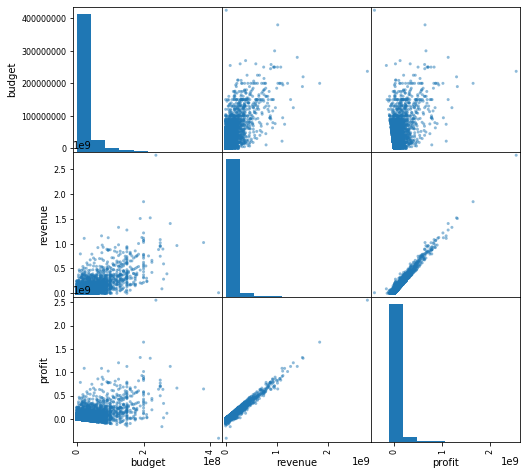

In [28]:
pd.plotting.scatter_matrix(df_p, figsize=(8,8));

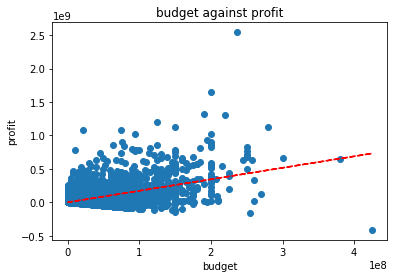

In [29]:
x=df_p['budget']
y =df_p['profit']
plt.scatter(x,y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), 'r--')
plt.xlabel('budget')
plt.ylabel('profit')
plt.title('budget against profit')
plt.show()


plot of budget against profit shows a positive trendline, hence the higher budget movies gave a larger profit, though this is not true for all movies

### Question 7 <a id='q7'></a>
In this analysis we see the effect of vote counts on other characteristics

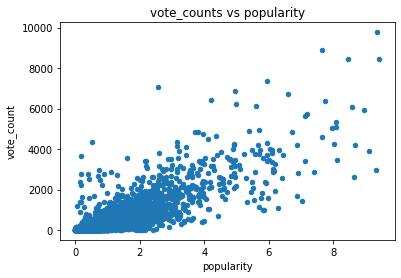

In [30]:
df.plot(x='popularity', y='vote_count', kind='scatter', title='vote_counts vs popularity');

from the plot above we can see a positive correlation between vote counts and popularity, hence the more people voted a movie the more its popularity rating increased

In [31]:
df_c = df.query('vote_count>9000')
df_c

,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,popularity_groupings,movie_length,profit
1919,tt1375666,9.363643,160000000,825500000,Inception,Leonardo DiCaprio|Joseph Gordon-Levitt|Ellen P...,Christopher Nolan,148,Action|Thriller|Science Fiction|Mystery|Adventure,Legendary Pictures|Warner Bros.|Syncopy,2010-07-14,9767,7.9,2010,160000000.0,825500000.0,very popular,standard length,665500000


the movie with the most votes was <strong>Inception</strong> with a popularity of 9.36 aproximately

In [32]:
df_vote = df.sort_values('vote_count', ascending=False).head(100)
df_vote.head()

,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,popularity_groupings,movie_length,profit
1919,tt1375666,9.363643,160000000,825500000,Inception,Leonardo DiCaprio|Joseph Gordon-Levitt|Ellen P...,Christopher Nolan,148,Action|Thriller|Science Fiction|Mystery|Adventure,Legendary Pictures|Warner Bros.|Syncopy,2010-07-14,9767,7.9,2010,1.600000e+08,8.255000e+08,very popular,standard length,665500000
4361,tt0848228,7.637767,220000000,1519557910,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,Joss Whedon,143,Science Fiction|Action|Adventure,Marvel Studios,2012-04-25,8903,7.3,2012,2.089437e+08,1.443191e+09,very popular,standard length,1299557910
1386,tt0499549,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,8458,7.1,2009,2.408869e+08,2.827124e+09,very popular,standard length,2544505847
2875,tt0468569,8.466668,185000000,1001921825,The Dark Knight,Christian Bale|Michael Caine|Heath Ledger|Aaro...,Christopher Nolan,152,Drama|Action|Crime|Thriller,DC Comics|Legendary Pictures|Warner Bros.|Syncopy,2008-07-16,8432,8.1,2008,1.873655e+08,1.014733e+09,very popular,standard length,816921825
4364,tt1853728,5.944518,100000000,425368238,Django Unchained,Jamie Foxx|Christoph Waltz|Leonardo DiCaprio|K...,Quentin Tarantino,165,Drama|Western,Columbia Pictures|The Weinstein Company,2012-12-25,7375,7.7,2012,9.497443e+07,4.039911e+08,very popular,standard length,325368238


creating a dataframe containing movies with the top 100 votes

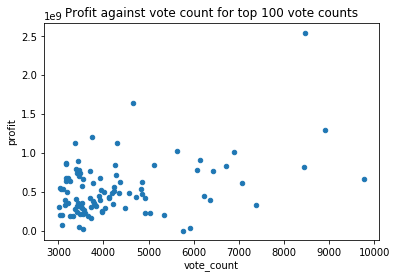

In [33]:
df_vote.plot(x='vote_count', y='profit', kind='scatter', title='Profit against vote count for top 100 vote counts');


From this plot we can see that there is a positive correlation between voting and profit, and the movies with thr highest profit has one of the highest vote counts

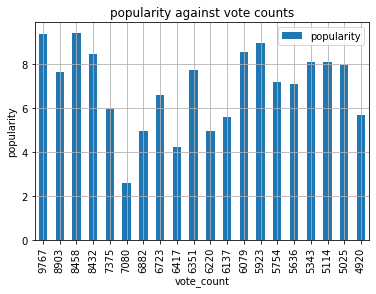

In [34]:
df_vote.head(20).plot(x='vote_count', y='popularity', kind='bar', title='popularity against vote counts');
plt.ylabel('popularity');
plt.grid(True)

from this bar chart we can see that the movies with the highest votes were the some of the most popular

<a id='conclusions'></a>
## Conclusions
From the analysis abpve the questions posed have being answered, which are:
<ul>
    <li>the genre <strong>drama</strong> the most movies the years</li>
    <li>the number of unique actors that all acted in our analyzed clean data movies are 17,121 actors, with the actor with the most movies being Robert De Niro with 72 movies</li>
    <li>which movies made the most revenue and how popular were they</li>
    <li>movies with runtime between 100 minutes and 180 minutes were the most popular</li>
    <li>the more popular a movie was the more, the more profit it turned up
    <li>there are some movies with 0 budget did they turn up a profit and did any movie at all turn up a loss</li>
    <li>also the more people voted on a movie which went ahead to record a large profit and high popularity</li>
</ul>


while carrying out my analysis, i made use of some resources and codes. some of which are form the following sites:
<ul>
    <li>geeksforgeeks.org</li>
    <li>medium.com</li>
    <li>codingnomads.co</li>
    <li>analyticsvidhya.com</li>
    <li>stackoverflow.com</li>

### Limitations
During the analysis i was not able to use the cast dolumn as the values were all too unique.
the vote_average column was not used at all as i could not understand the meaning behind the data
correlation between the vote counts and the popularity are ambiguous as the popularity is based on the voting not how many people were actually aware of the movie